In [20]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [35]:
IMAGE_SIZE=[224,224]

train='train'
test='test'

In [36]:
resnet=ResNet50(input_shape=IMAGE_SIZE+[3],weights="imagenet",include_top=False)

In [37]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [38]:
for layer in resnet.layers:
    layer.trainable=False

In [39]:
folders=glob('train/*')

In [40]:
folders

['train\\NORMAL', 'train\\PNEUMONIA']

In [41]:
x=Flatten()(resnet.output)

In [42]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [43]:
model.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [44]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [46]:
training_set=train_datagen.flow_from_directory('train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 148 images belonging to 2 classes.


In [47]:
testing_set=train_datagen.flow_from_directory('test',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 40 images belonging to 2 classes.


In [48]:
r=model.fit_generator(training_set,
                     validation_data=testing_set,
                     epochs=10,
                     steps_per_epoch=len(training_set),
                     validation_steps=len(testing_set))

Epoch 1/10
5/5 [==============================] - 23s 5s/step - loss: 4.8076 - accuracy: 0.4595 - val_loss: 0.8657 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 17s 3s/step - loss: 1.5994 - accuracy: 0.4865 - val_loss: 1.9778 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 18s 4s/step - loss: 1.2662 - accuracy: 0.5203 - val_loss: 0.4082 - val_accuracy: 0.8000
Epoch 4/10
5/5 [==============================] - 19s 4s/step - loss: 0.8050 - accuracy: 0.5811 - val_loss: 0.3523 - val_accuracy: 0.9250
Epoch 5/10
5/5 [==============================] - 17s 3s/step - loss: 0.4435 - accuracy: 0.7838 - val_loss: 0.3467 - val_accuracy: 0.9000
Epoch 6/10
5/5 [==============================] - 17s 3s/step - loss: 0.4343 - accuracy: 0.7703 - val_loss: 0.4994 - val_accuracy: 0.7250
Epoch 7/10
5/5 [==============================] - 17s 3s/step - loss: 0.5640 - accuracy: 0.7568 - val_loss: 0.5268 - val_accuracy: 0.7250
Epoch 8/10
5/5 [==================

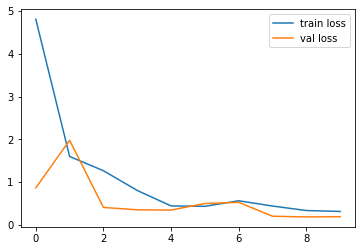

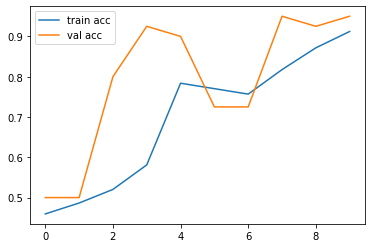

<Figure size 432x288 with 0 Axes>

In [49]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [50]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')


In [51]:
y_pred=model.predict(testing_set)

In [52]:
y_pred

array([[0.77355504, 0.22644493],
       [0.991591  , 0.00840894],
       [0.04032774, 0.9596722 ],
       [0.574163  , 0.42583695],
       [0.07939523, 0.9206048 ],
       [0.02532187, 0.9746781 ],
       [0.85360163, 0.14639835],
       [0.9190316 , 0.08096835],
       [0.9789701 , 0.02102992],
       [0.034738  , 0.96526194],
       [0.9519095 , 0.04809054],
       [0.23958656, 0.7604134 ],
       [0.04302443, 0.95697564],
       [0.06159101, 0.93840903],
       [0.96123064, 0.03876934],
       [0.03736002, 0.9626399 ],
       [0.97258747, 0.02741245],
       [0.08149511, 0.9185049 ],
       [0.08249551, 0.9175045 ],
       [0.9807896 , 0.01921044],
       [0.09260087, 0.9073991 ],
       [0.39533317, 0.6046668 ],
       [0.5514621 , 0.44853795],
       [0.02661349, 0.9733865 ],
       [0.79830205, 0.20169796],
       [0.98344016, 0.01655979],
       [0.9957312 , 0.00426877],
       [0.05031617, 0.9496839 ],
       [0.03949395, 0.960506  ],
       [0.9973943 , 0.00260561],
       [0.

In [53]:
import numpy as np

y_pred=np.argmax(y_pred,axis=1)

In [54]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [55]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_resnet50.h5')

In [58]:
img=image.load_img('test/PNEUMONIA/ryct.2020200034.fig2.jpeg',target_size=(224,224))

In [59]:
x=image.img_to_array(img)
x

array([[[ 98.,  98.,  98.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 65.,  65.,  65.],
        [ 69.,  69.,  69.],
        [ 68.,  68.,  68.]],

       [[105., 105., 105.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 75.,  75.,  75.],
        [ 73.,  73.,  73.],
        [ 73.,  73.,  73.]],

       [[105., 105., 105.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 84.,  84.,  84.],
        [ 81.,  81.,  81.],
        [ 81.,  81.,  81.]],

       ...,

       [[163., 163., 163.],
        [ 96.,  96.,  96.],
        [106., 106., 106.],
        ...,
        [ 82.,  82.,  82.],
        [ 64.,  64.,  64.],
        [ 54.,  54.,  54.]],

       [[161., 161., 161.],
        [ 98.,  98.,  98.],
        [105., 105., 105.],
        ...,
        [ 79.,  79.,  79.],
        [ 61.,  61.,  61.],
        [ 53.,  53.,  53.]],

       [[155., 155., 155.],
        [ 95.,  95.,  95.],
        [107., 1

In [60]:
x.shape

(224, 224, 3)

In [61]:
x=x/255

In [62]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [63]:
model.predict(img_data)

array([[0.00367104, 0.996329  ]], dtype=float32)